<a href="https://colab.research.google.com/github/aniketmaini/Minor/blob/bengali/minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [0]:
!pip install translate

In [0]:
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import pytesseract
import re
from translate import Translator

### here we have included all the necessary libraries

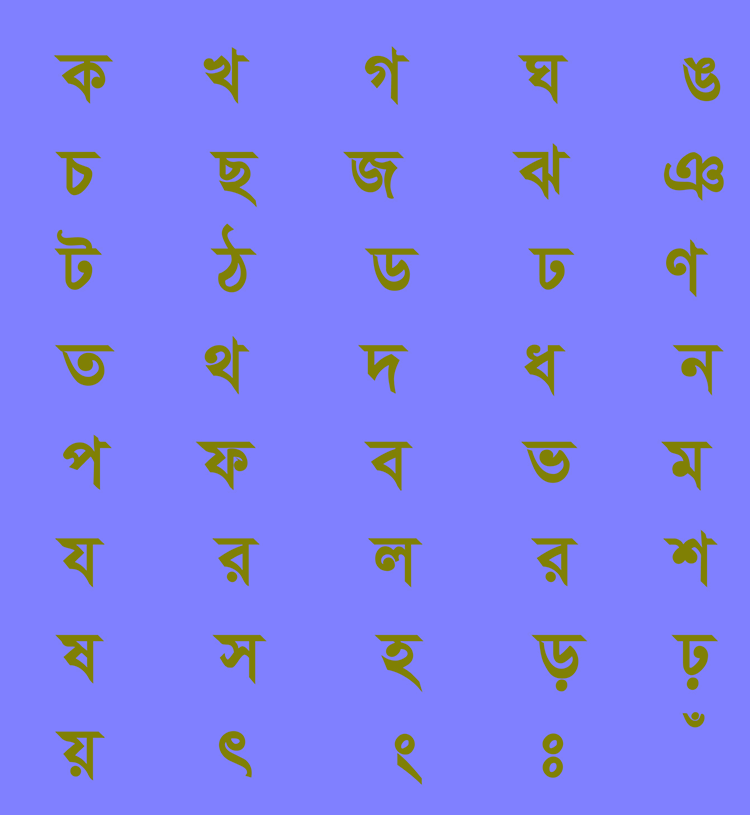

In [0]:
#-----Reading the image-----------------------------------------------------
img = cv2.imread('image.jpg')
#cv2.imshow("img",img) 

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#cv2.imshow("lab",lab)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
#cv2.imshow('l_channel', l)
#cv2.imshow('a_channel', a)
#cv2.imshow('b_channel', b)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
#cv2.imshow('CLAHE output', cl)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
#cv2.imshow('limg', limg)

#-----Converting image from LAB Color model to RGB model--------------------
#image1 = cv2.cvtColor(img, cv2.COLOR_LAB2BGR)
cv2_imshow(limg)



In [0]:
limg.shape

(815, 750, 3)

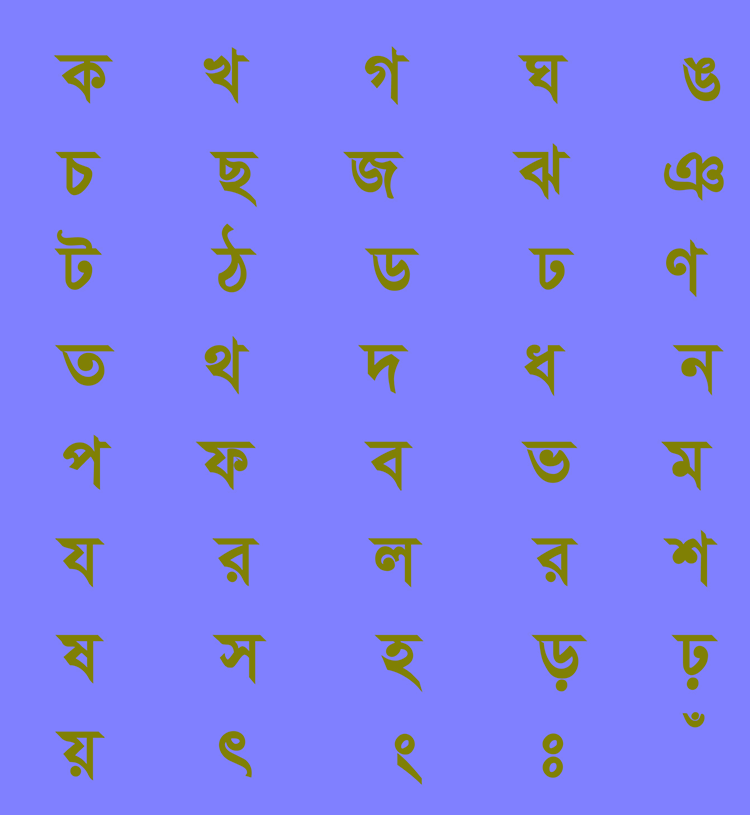

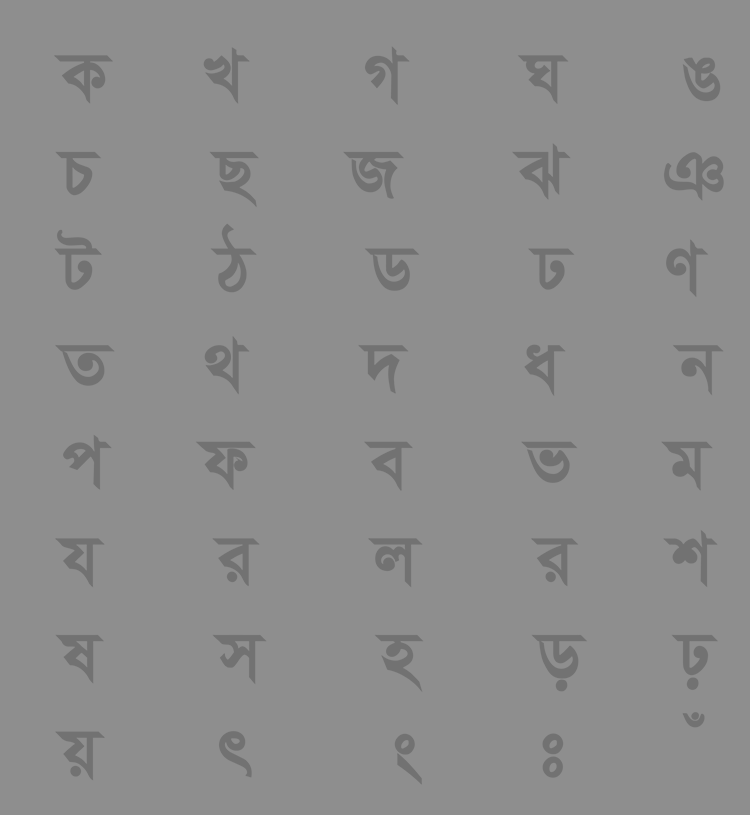

In [0]:
#img=cv2.imread('image.jpg')
scale_percent = 100 # percent of original size
width = int(limg.shape[1] * scale_percent / 100)
height = int(limg.shape[0] * scale_percent / 100)
dim = (width, height)

image = cv2.resize(limg, dim, interpolation = cv2.INTER_AREA)
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2_imshow(gray)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

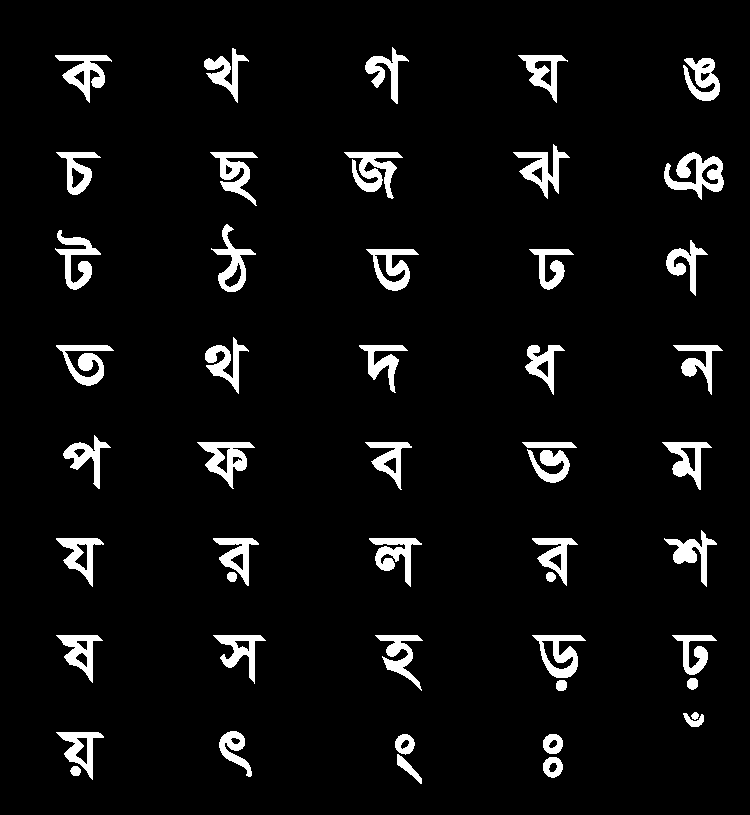

In [0]:
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

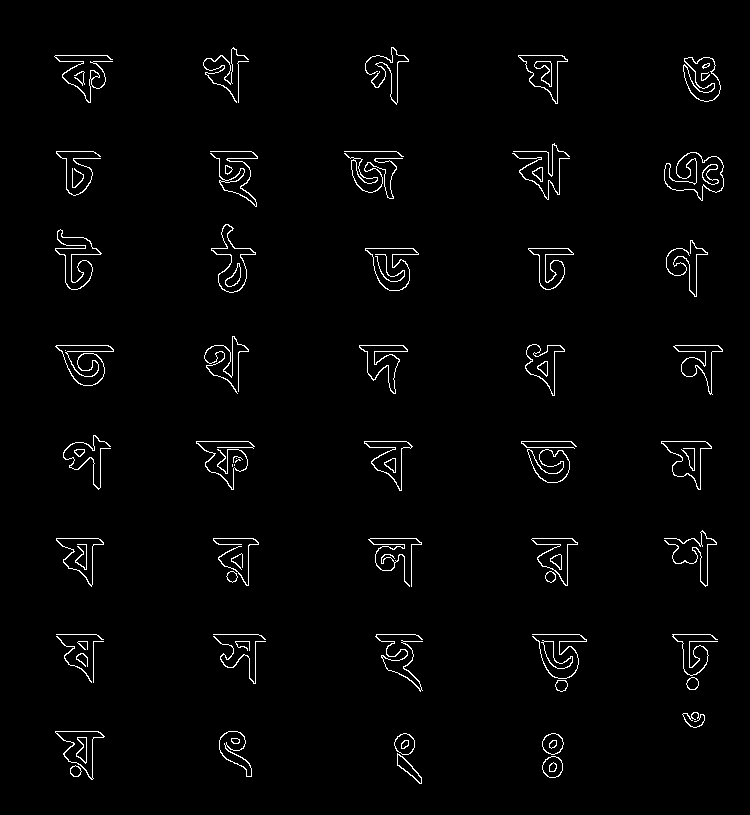

In [0]:
#img = cv2.imread('image.jpg')
edges=cv2.Canny(image, 100,200)
cv2_imshow(edges)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

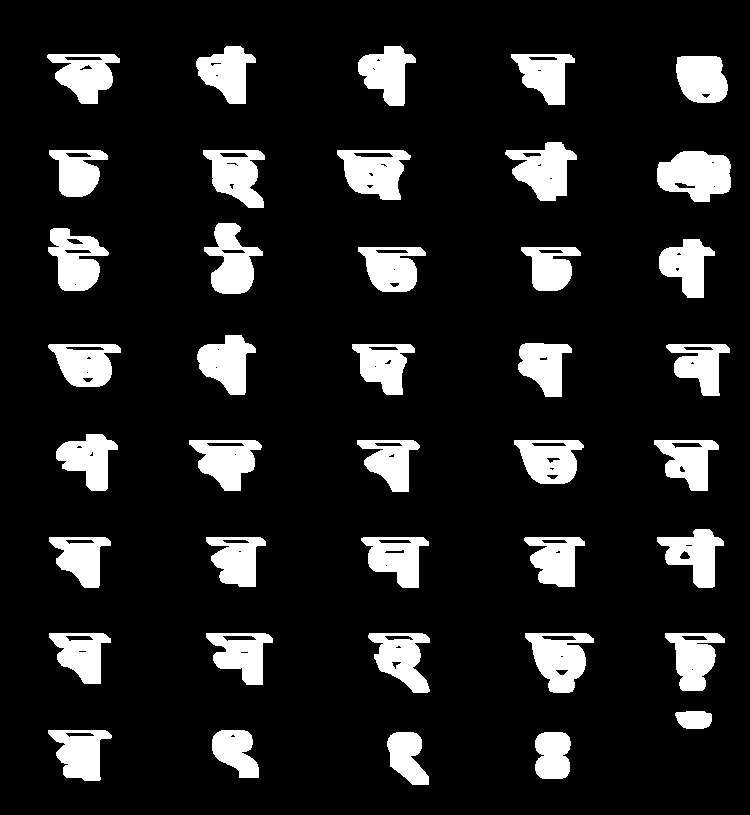

In [0]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 3))
dilation = cv2.dilate(edges,rect_kernel, iterations=1)
cv2_imshow(dilation)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [0]:
type(dilation)
dilation.shape

(815, 750)

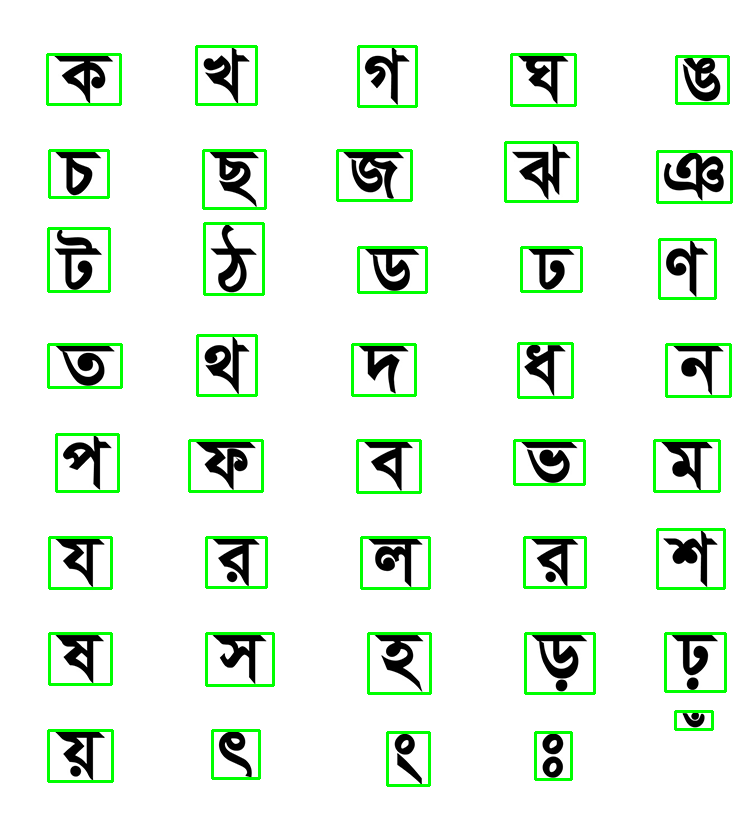

In [0]:
## these below two lines which have been commented are used to sve each contour in a different image file generated using cv2.imwrite

contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im2 = img.copy()
idx=0
for cnt in contours:
    x,y,w,h= cv2.boundingRect(cnt)
    if w>15 or h>15:
        idx+=1
        new_img=image[y:y+h,x:x+w]
        cv2.imwrite(str(idx)+'.png',new_img)
    cv2.rectangle(im2,(x,y),(x+w ,y+h), (0,255,0), 2)
cv2_imshow(im2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## the contours formed will be saved in the current directory as you can see on the left hand side of the screen

In [0]:
for img in glob.glob('*.png'):
  extractedInformation = pytesseract.image_to_string(img,lang='ben')
  print(extractedInformation)
### every image stored from the above step will be processed through pytesseract to identify the extracted bengali digit

'৯ গু৮ চিনির সি*\n\nদিড়িসিদসি সি দি সি ০\n৮৮টতিসি চিছদিডর্চি্\nক্ূ রিপজিজরডিদিচি%\n\nডি 2ি!]১ জি $ ডি দি ডি'

In [0]:
pytesseract.image_to_string('1.png', lang='ben')

'০০'